<a href="https://www.kaggle.com/code/harshbhutra/notebook4965220424?scriptVersionId=138650335" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:98: UserWarning: unable to load libtensorflow_io_plugins.so: unable to open file: libtensorflow_io_plugins.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so: undefined symbol: _ZN3tsl6StatusC1EN10tensorflow5error4CodeESt17basic_string_viewIcSt11char_traitsIcEENS_14SourceLocationE']
  warnings.warn(f"unable to load libtensorflow_io_plugins.so: {e}")
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:104: UserWarning: file system plugins are not loaded: unable to open file: l

Epoch 1/20
640/640 [==============================] - 77s 119ms/step - loss: 0.4715 - accuracy: 0.9028 - val_loss: 0.4341 - val_accuracy: 0.9092
Epoch 2/20
640/640 [==============================] - 74s 116ms/step - loss: 0.4571 - accuracy: 0.9041 - val_loss: 0.4273 - val_accuracy: 0.9092
Epoch 3/20
640/640 [==============================] - 74s 115ms/step - loss: 0.4575 - accuracy: 0.9041 - val_loss: 0.4687 - val_accuracy: 0.9092
Epoch 4/20
640/640 [==============================] - 73s 114ms/step - loss: 0.4545 - accuracy: 0.9041 - val_loss: 0.4297 - val_accuracy: 0.9092
Epoch 5/20
640/640 [==============================] - 73s 113ms/step - loss: 0.4538 - accuracy: 0.9041 - val_loss: 0.4278 - val_accuracy: 0.9092
Epoch 6/20
640/640 [==============================] - 74s 115ms/step - loss: 0.4526 - accuracy: 0.9041 - val_loss: 0.4258 - val_accuracy: 0.9092
Epoch 7/20
640/640 [==============================] - 74s 116ms/step - loss: 0.4497 - accuracy: 0.9041 - val_loss: 0.4255 - val_ac

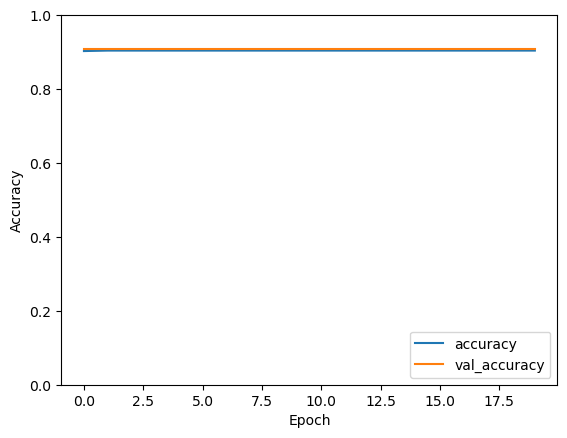

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from sklearn.model_selection import train_test_split

# Define image and label folders
image_folder = '/kaggle/input/tilda-400-64x64-patches/'
label_names = ['good', 'objects', 'hole', 'oil spot', 'thread error']

# Load images and labels
images = []
labels = []

for label_idx, label_name in enumerate(label_names):
    label_folder = os.path.join(image_folder, label_name)
    for img_file in os.listdir(label_folder):
        img = plt.imread(os.path.join(label_folder, img_file))
        images.append(img)
        labels.append(label_idx)

images = np.array(images)
labels = np.array(labels)

# Split the data into training and validation sets
train_images, val_images, train_labels, val_labels = train_test_split(images, labels, test_size=0.2, random_state=42)

# Create data generators with data augmentation
train_datagen = ImageDataGenerator(rescale=1.0/255.0,
                                   rotation_range=10,
                                   width_shift_range=0.1,
                                   height_shift_range=0.1,
                                   shear_range=0.1,
                                   zoom_range=0.1,
                                   horizontal_flip=True,
                                   fill_mode='nearest')

val_datagen = ImageDataGenerator(rescale=1.0/255.0)

train_generator = train_datagen.flow(train_images, train_labels, batch_size=32)
val_generator = val_datagen.flow(val_images, val_labels, batch_size=32)

# Build the CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 3)),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dropout(0.5),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(5, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(train_generator, epochs=20, validation_data=val_generator)

# Plot training history
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.show()


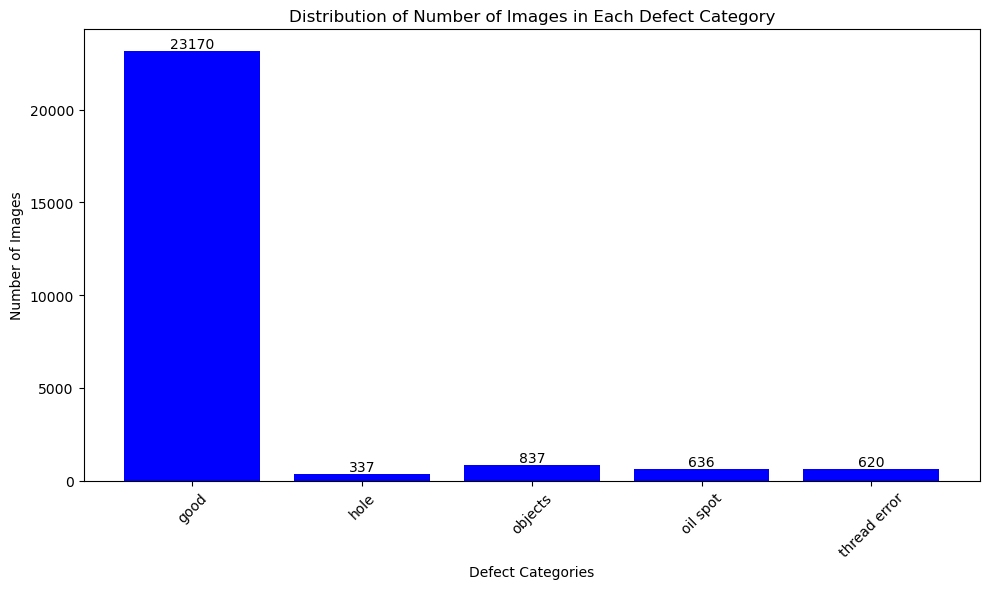

In [2]:
import os
import matplotlib.pyplot as plt

defect_categories = ['good', 'hole', 'objects', 'oil spot', 'thread error']
folder_paths = [
    '/kaggle/input/tilda-400-64x64-patches/good/',
    '/kaggle/input/tilda-400-64x64-patches/hole/',
    '/kaggle/input/tilda-400-64x64-patches/objects/',
    '/kaggle/input/tilda-400-64x64-patches/oil spot/',
    '/kaggle/input/tilda-400-64x64-patches/thread error/'
]

# Function to count the number of images in a folder
def count_images_in_folder(folder_path):
    return len([file for file in os.listdir(folder_path) if file.endswith('.png')])

# number of images in each folder
image_counts = [count_images_in_folder(folder) for folder in folder_paths]

# Create a bar plot
plt.figure(figsize=(10, 6))
bars = plt.bar(defect_categories, image_counts, color='blue')

for bar, count in zip(bars, image_counts):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), str(count), ha='center', va='bottom')

plt.xlabel('Defect Categories')
plt.ylabel('Number of Images')
plt.title('Distribution of Number of Images in Each Defect Category')
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()
